In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
# Set style for visualizations
# plt.style.use('seaborn')
sns.set_palette('husl')
# Set random seed for reproducibility
np.random.seed(42)

In [7]:
# Load the dataset
file_path = "D:/DEPI/supply_chain_data.csv"
df = pd.read_csv(file_path)
# Display basic information
print("Dataset Info:")
df.info()
print("First few rows:")
display(df.head()) 
print("nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location     

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


nMissing Values:
Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


In [8]:
# Data Cleaning Functions
def clean_data(df):
        # Handle missing values
        numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
        categorical_cols = df.select_dtypes(include=['object']).columns

        for col in numeric_cols:
            df[col].fillna(df[col].median(), inplace=True)

        for col in categorical_cols:
            df[col].fillna(df[col].mode()[0], inplace=True)
        # Handle outliers using IQR method
        for col in numeric_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            df[col] = df[col].clip(lower=Q1 - 1.5*IQR, upper=Q3 + 1.5*IQR)
        return df
    # Clean the data
df = clean_data(df)

In [9]:
# Feature Engineering
def create_features(df):
        # Profit Margin
        df['Profit_Margn'] = (df['Revenue generated'] - (df['Price'] * df['Number of products sold'])) / df['Revenue generated']
        
        # Inventory Turnover
        df['Inventory_Turnover'] = df['Number of products sold'] / df['Stock levels']
        
        # Stock to Sales Ratio
        df['Stock_to_Sales_Ratio'] = df['Stock levels'] / df['Number of products sold']
        
        # Price Categories
        df['Price_Category'] = pd.qcut(df['Price'], q=4, labels=['Budget', 'Economy', 'Premium', 'Luxury'])
        
        return df
# Create new features
df = create_features(df)

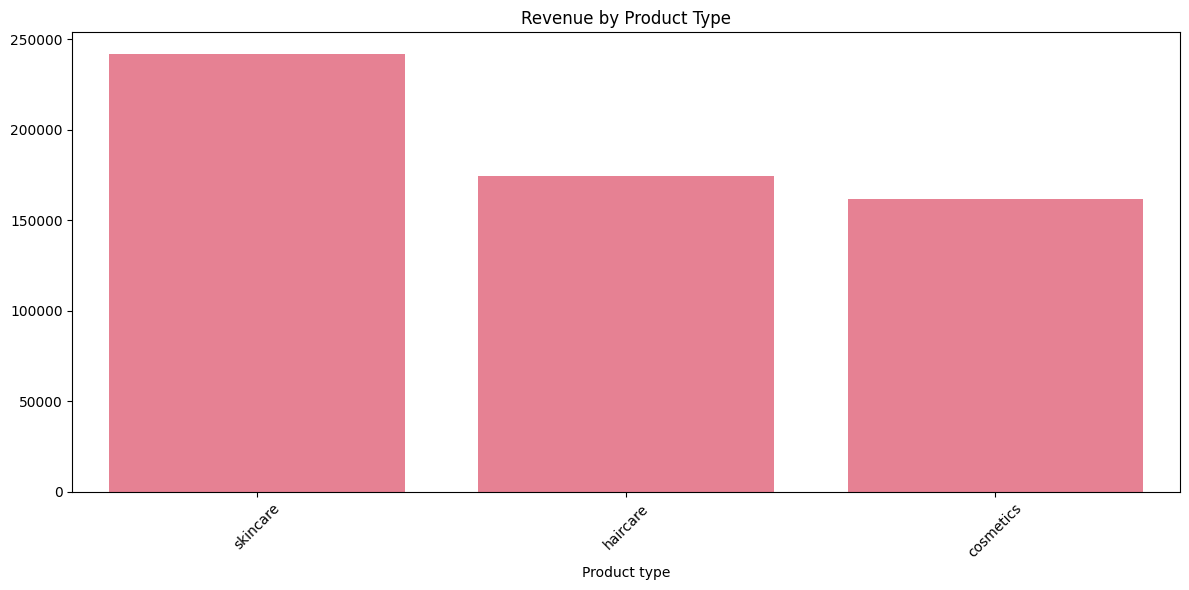

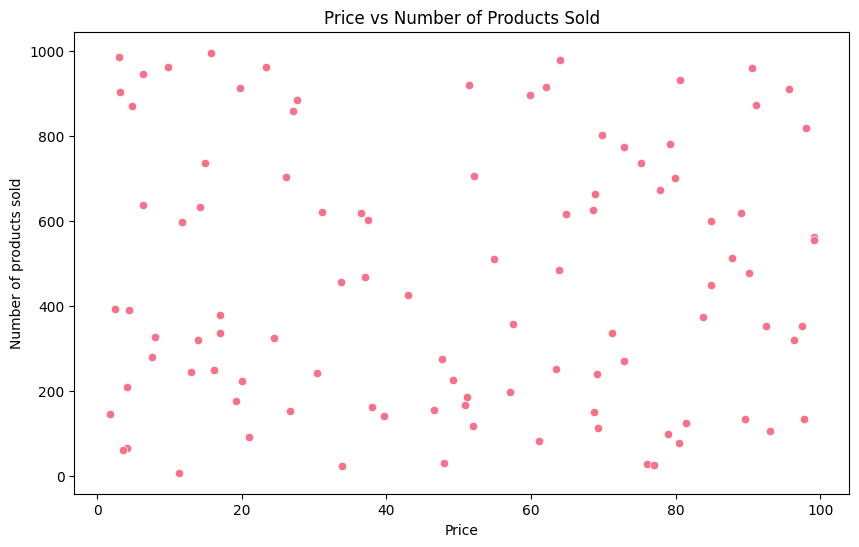

Correlation between Price and Number of products sold: {correlation:.2f}


In [10]:
# 1. Product Performance Analysis
# # Revenue by Product Type
plt.figure(figsize=(12, 6))
revenue_by_product = df.groupby('Product type')['Revenue generated'].sum().sort_values(ascending=False)
sns.barplot(x=revenue_by_product.index, y=revenue_by_product.values)
plt.title('Revenue by Product Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Price vs Sales Correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Number of products sold')
plt.title('Price vs Number of Products Sold')
plt.show()
# Print correlation coefficient
correlation = df['Price'].corr(df['Number of products sold'])
print("Correlation between Price and Number of products sold: {correlation:.2f}")

In [ ]:
  "# 2. Inventory Management Analysis\n",
    "\n",
    "# Stock Levels vs Sales\n",
    "plt.figure(figsize=(10, 6))\n",
    "sns.scatterplot(data=df, x='Stock levels', y='Number of products sold', hue='Product type')\n",
    "plt.title('Stock Levels vs Sales by Product Type')\n",
    "plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')\n",
    "plt.tight_layout()\n",
    "plt.show()\n",
    "\n",
    "# Availability Impact\n",
    "plt.figure(figsize=(10, 6))\n",
    "sns.boxplot(data=df, x='Availability', y='Number of products sold')\n",
    "plt.title('Impact of Availability on Sales')\n",
    "plt.show()"

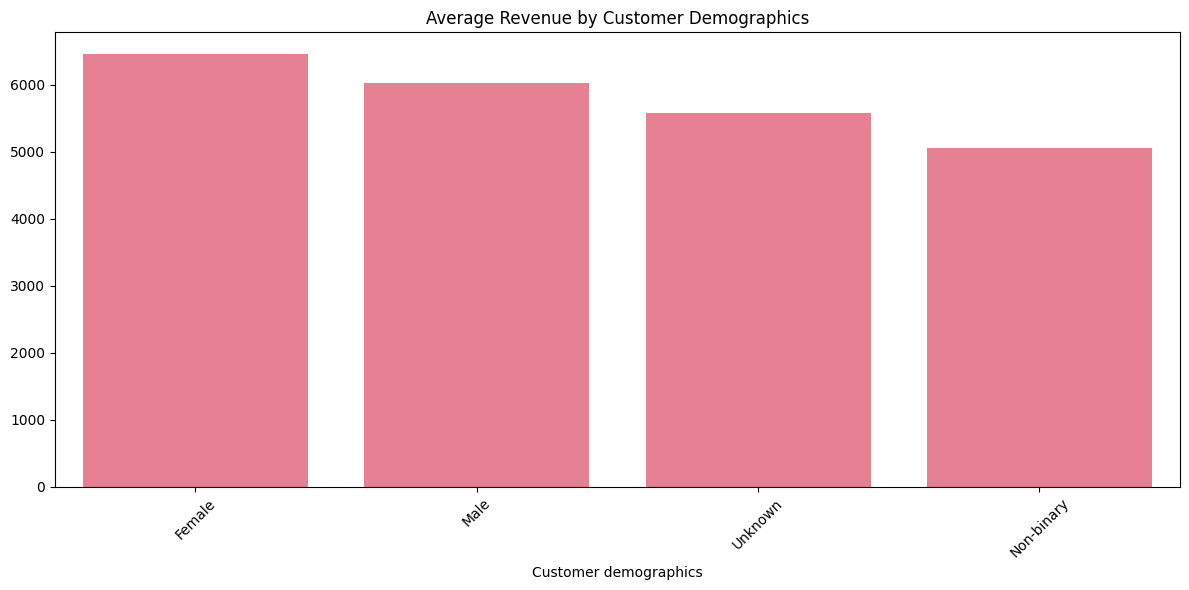

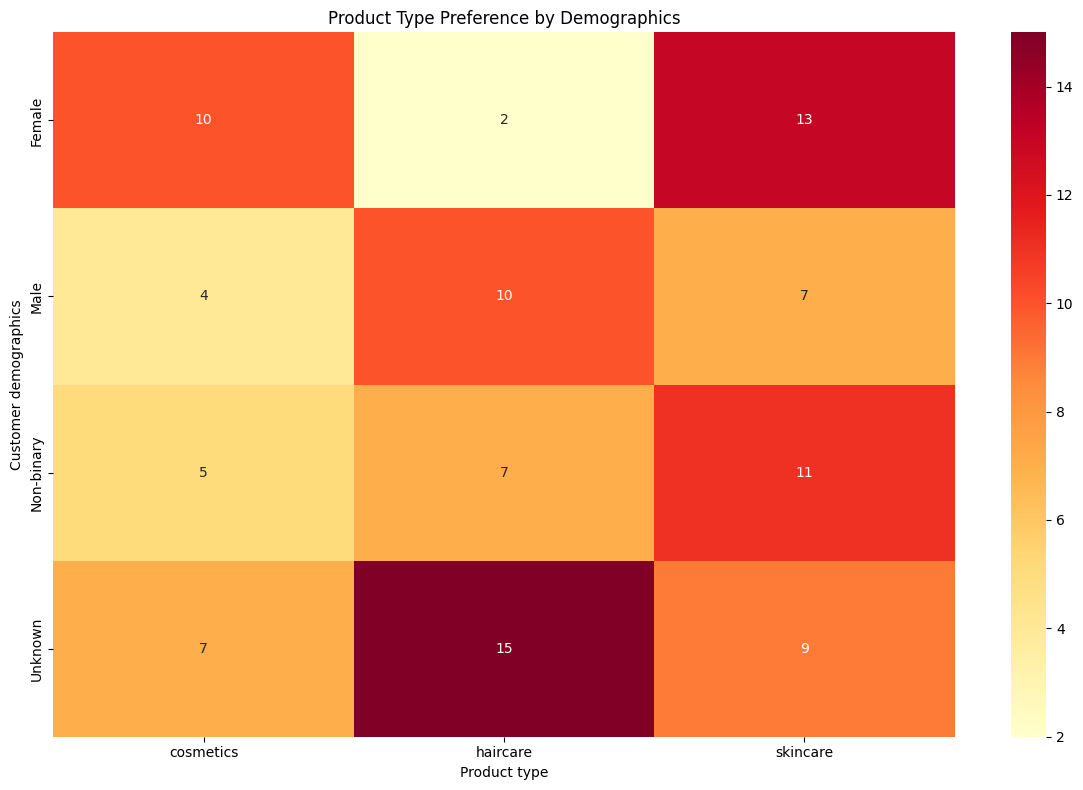

In [12]:
#3. Customer Demographics Analysis
# Revenue by Demographics
plt.figure(figsize=(12, 6))
revenue_by_demo = df.groupby('Customer demographics')['Revenue generated'].mean().sort_values(ascending=False)
sns.barplot(x=revenue_by_demo.index, y=revenue_by_demo.values)
plt.title('Average Revenue by Customer Demographics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Product Preference by Demographics
plt.figure(figsize=(12, 8))
product_demo = pd.crosstab(df['Customer demographics'], df['Product type'])
sns.heatmap(product_demo, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Product Type Preference by Demographics')
plt.tight_layout()
plt.show()